In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

# Epydemix import
import sys
sys.path.append("../")
from epydemix.population import Population, load_population

# Population Object

The ```Population``` object represents the population on which the epidemic is simulated. It has the following key attributes:

- ```contact_matrices```: this a dictionary of contact matrices. Each element $i, j$ of the contact matrix represents the rate of contact between two demographic groups in a given context (e.g., schools, workplaces). The context of the contacts are defined in the key of the dictionary.

- ```Nk```: this is an array representing the number of individuals in each demographic group (e.g., age groups). The name of demographic groups (e.g.,```0-9, 10-19, ...```) is collected in the attribute ```Nk_names```

We will now create a first ```Population``` object named ```Indonesia```:


In [2]:
population = Population(name="Indonesia")

We then add contact matrices using the ```add_contact_matrix``` method, which takes as input a 2D numpy array representing the contact matrix and a ```layer_name``` indicating the context of the contacts:

In [3]:
population.add_contact_matrix(pd.read_csv("../epydemix_data/Indonesia/contact_matrices/prem_2017/contacts_matrix_work.csv", header=None).values, 
                              layer_name="work")
population.add_contact_matrix(pd.read_csv("../epydemix_data/Indonesia/contact_matrices/prem_2017/contacts_matrix_home.csv", header=None).values,
                              layer_name="home")
population.add_contact_matrix(pd.read_csv("../epydemix_data/Indonesia/contact_matrices/prem_2017/contacts_matrix_community.csv", header=None).values,
                              layer_name="community")
population.add_contact_matrix(pd.read_csv("../epydemix_data/Indonesia/contact_matrices/prem_2017/contacts_matrix_school.csv", header=None).values,
                              layer_name="school")

Similarly, we add demographic information using the ```add_population``` method, which takes as input a 1D numpy array representing the number of individuals in different age groups and a ```layer_name``` indicating names of groups:

In [4]:
population.add_population(Nk=pd.read_csv("../epydemix_data/Indonesia/demographic/age_distribution.csv")["value"].values, 
                          Nk_names=pd.read_csv("../epydemix_data/Indonesia/demographic/age_distribution.csv")["group_name"].values)

We have now created a ```Population``` object and initialized its key attributes. 

Alternatively, after downloading the ```epydemix``` data package we can strealime the process and automatically import contact matrices and demographic information for a given country. 

The list of geographies supported and the data format is provided at XXX

In [5]:
population = load_population(population_name="Indonesia")

Finally, we can plot some information on the population using the ```plotting``` module of ```epydemix```:

In [6]:
from epydemix.plotting import plot_contact_matrix, plot_population

First, we plot the contact matrices in the different settings:

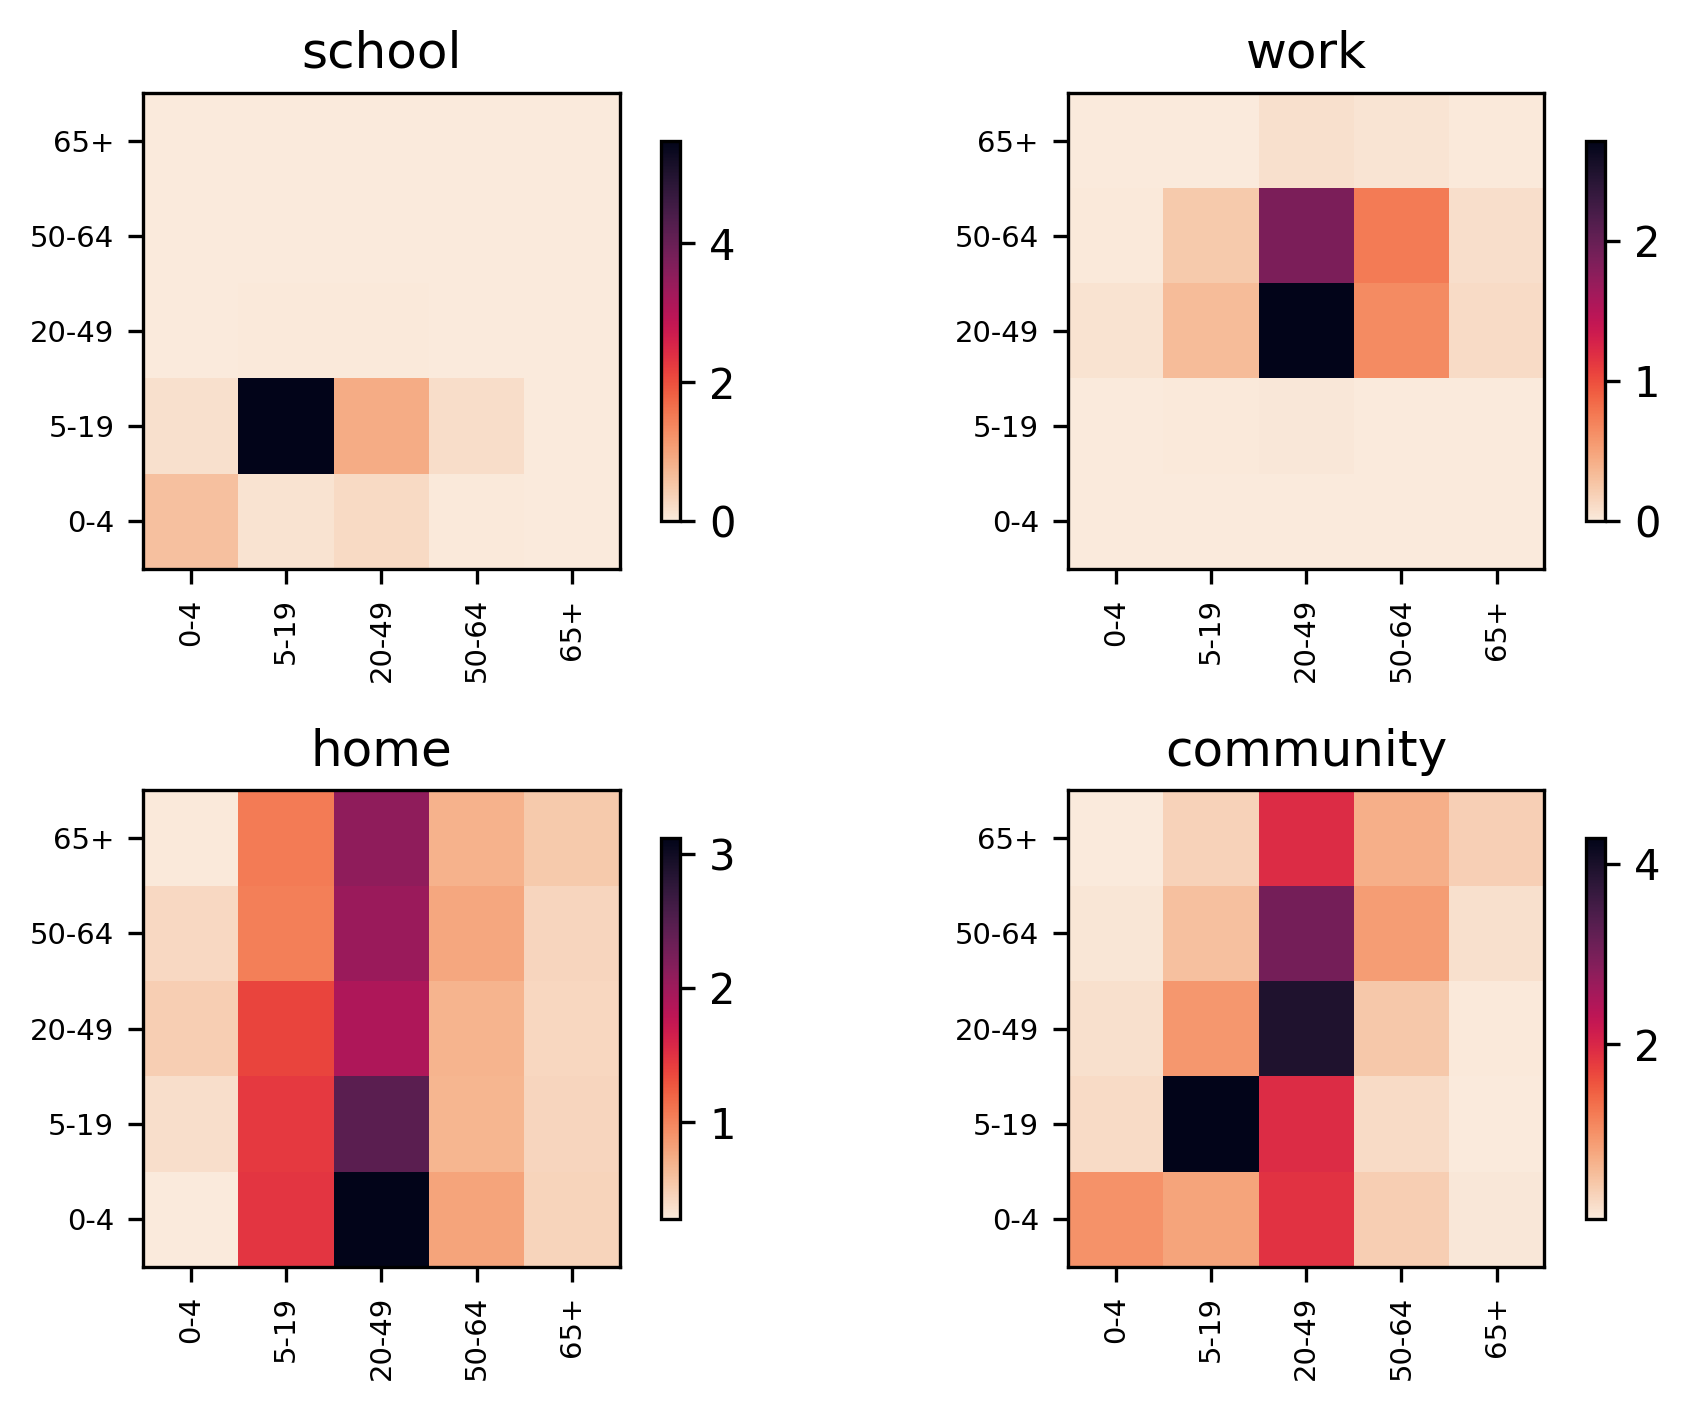

In [7]:
fig, axes = plt.subplots(nrows=2, ncols=2, dpi=300)
plot_contact_matrix(population, "school", ax=axes[0,0], labelsize=7)
plot_contact_matrix(population, "work", ax=axes[0,1], labelsize=7)
plot_contact_matrix(population, "home", ax=axes[1,0], labelsize=7)
plot_contact_matrix(population, "community", ax=axes[1,1], labelsize=7)
plt.tight_layout()

Then, we plot the number and percentage of individuals in different age groups:

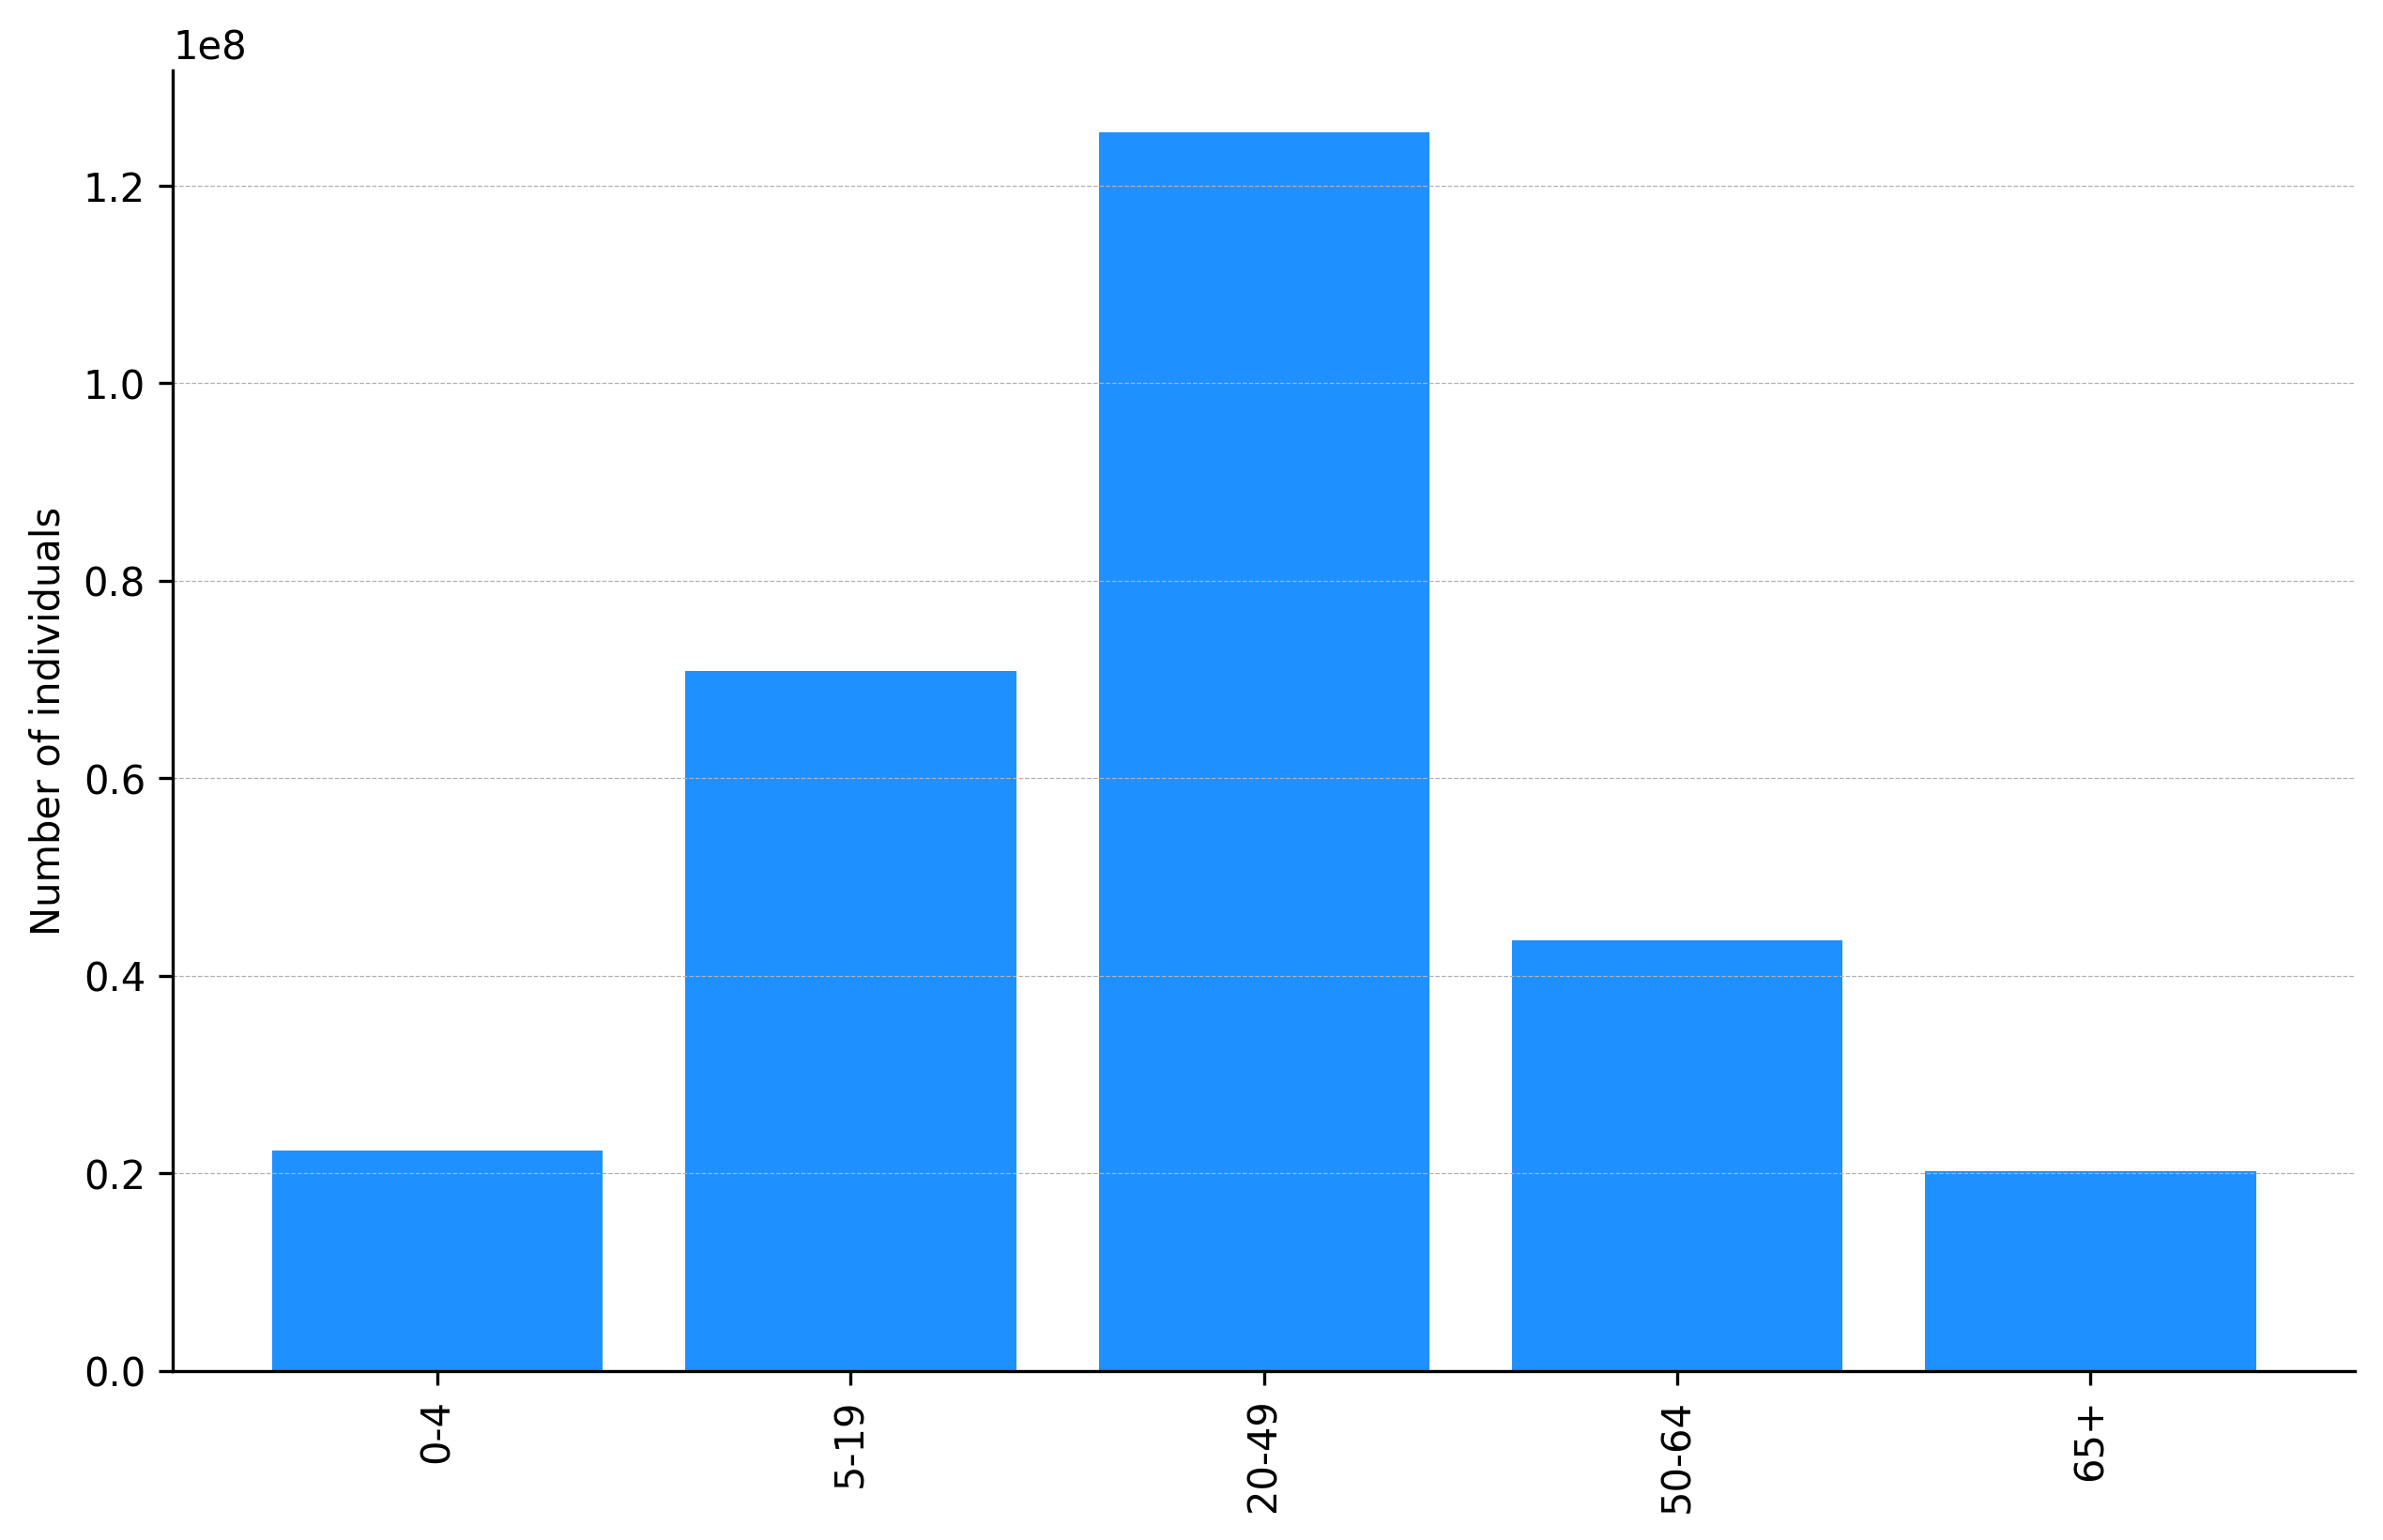

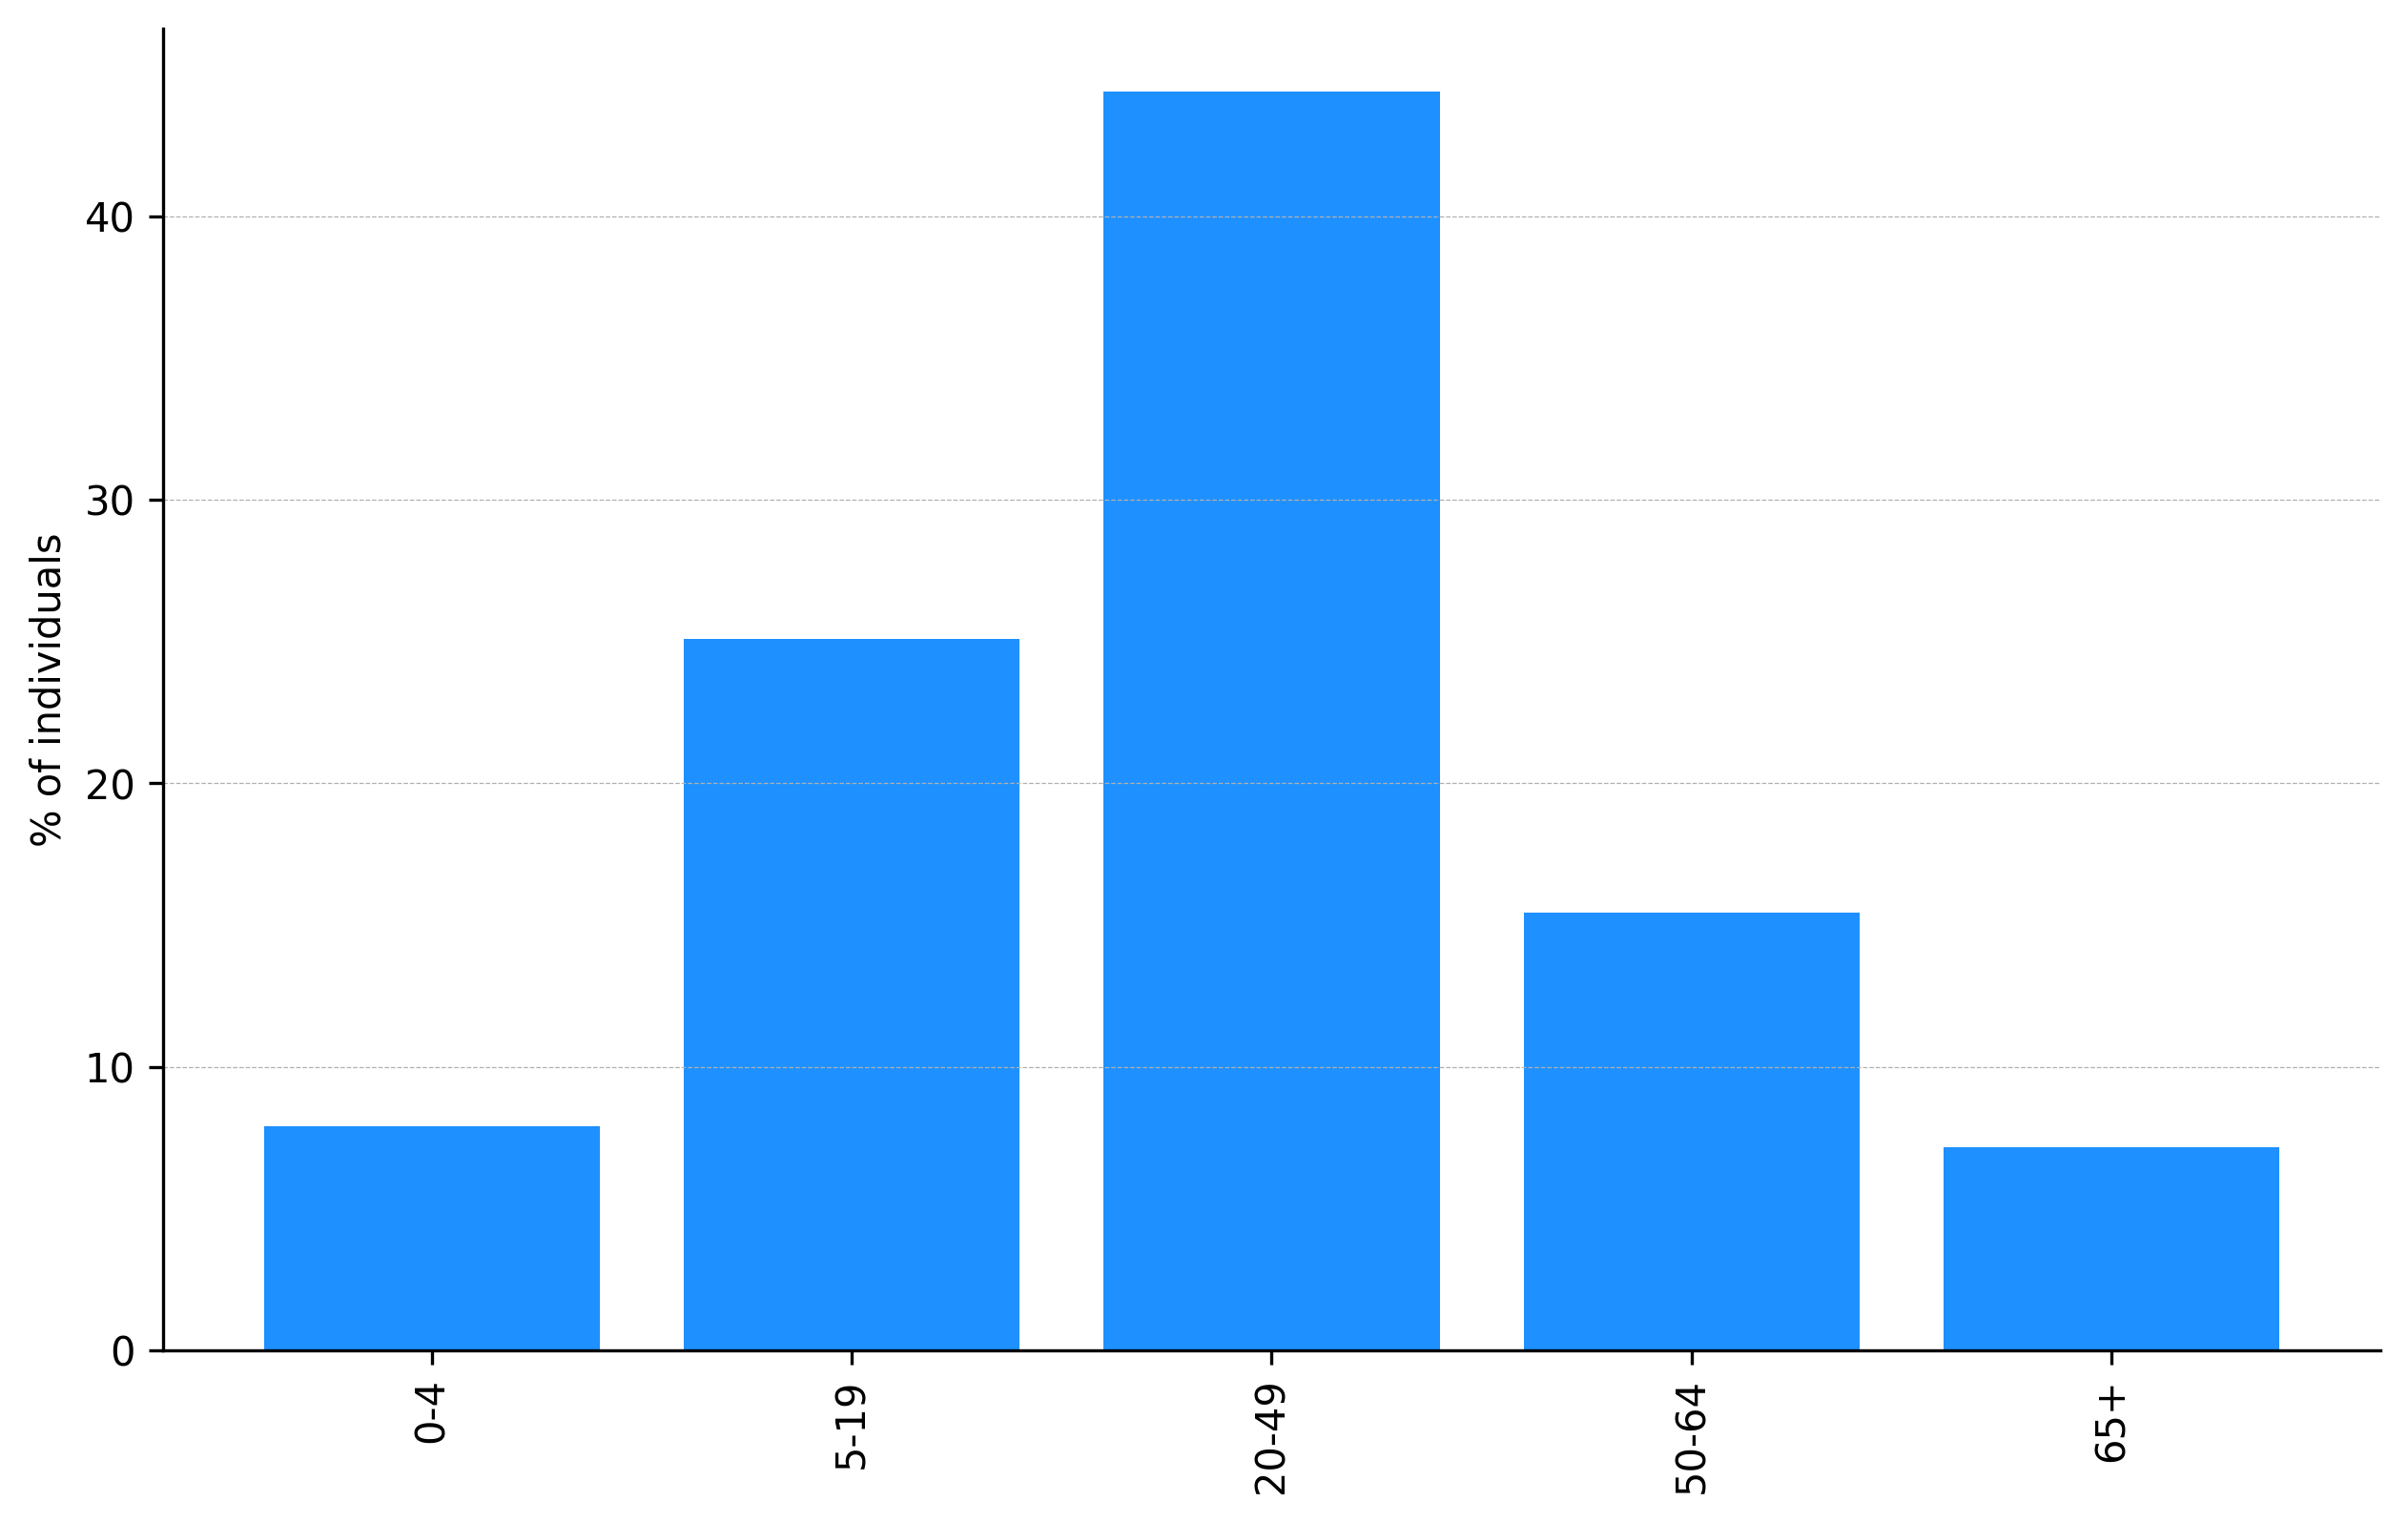

In [8]:
# raw numbers 
plot_population(population)

# percentage
plot_population(population, show_perc=True)